In [4]:
# zip dosyasını aç
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zip:
  # Tüm dosyaları zip dosyasından çıkar
  zip.extractall()

<!DOCTYPE html>
<html>
<head>
<style>
* {
  box-sizing: border-box;
}

.row {
  margin-left:-5px;
  margin-right:-5px;
}
  
.column {
  float: left;
  width: 50%;
  padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
  content: "";
  clear: both;
  display: table;
}

table {
  border-collapse: collapse;
  border-spacing: 0;
  width: 100%;
  border: 1px solid #ddd;
}

th, td {
  text-align: left;
  padding: 16px;
}

tr:nth-child(even) {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h2 style="text-align: center" >Veri Bilimi Projeleri</h2>
<h4 style="text-align: center">Part1 : 1.6 MILLION UK TRAFFIC ACCIDENTS<h4>

<br>
<div class="row">
  <div class="column">
    <table>
      <tr>
        <th>First Name</th>
        <th>Last Name</th>
      </tr>
      <tr>
        <td>Esad </td>
        <td>Boran</td>
      </tr>
    </table>
  </div>
</div>

</body>
</html>

# 1.Required Libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 2. Data Preprocessing

We combined the accidents from 2005 to 2017

In [ ]:
df1 = pd.read_csv("/content/archive/accidents_2005_to_2007.csv")
df2 = pd.read_csv("/content/archive/accidents_2009_to_2011.csv")
df3 = pd.read_csv("/content/archive/accidents_2012_to_2014.csv")

In [197]:
dataset = pd.concat([df1, df2, df3])
dataset = dataset.reset_index()
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

index Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0  515469       2.01E+12               459770.0                101610.0   
1  178694       2.01E+12               329220.0                213390.0   
2  218336  201014A096810               453820.0                406650.0   
3  104411  200532C515305               545350.0                375990.0   
4  400849    2.01133E+12               461940.0                300020.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -1.153039  50.810900            44                  3                   2   
1  -3.028205  51.814598            61                  2                   2   
2  -1.189081  53.553718            14                  3                   1   
3   0.177660  53.260985            32                  3                   4   
4  -1.087030  52.594426            33                  3                   1   

   Number_of_Casualties  ... Pedestrian_Crossing-Physical_Facilities  \
0                     1  ...   No physical crossing within 50 meters   
1                     2  ...   No physical crossing within 50 meters   
2                     1  ...   No physical crossing within 50 meters   
3                     1  ...   No physical crossing within 50 meters   
4                     1  ...                          Central refuge   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1           Daylight: Street light present  Raining without high winds   
2           Daylight: Street light present     Fine without high winds   
3           Daylight: Street light present     Fine without high winds   
4  Darkness: Street lights present and lit  Raining without high winds   

   Road_Surface_Conditions Special_Conditions_at_Site  \
0                 Wet/Damp                       None   
1                 Wet/Damp                       None   
2                      Dry                       None   
3                 Wet/Damp                       None   
4                 Wet/Damp                       None   

           Carriageway_Hazards  Urban_or_Rural_Area  \
0  Other object in carriageway                    1   
1                         None                    1   
2                         None                    1   
3                         None                    2   
4                         None                    1   

  Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  Year  
0                                         Yes                  E01022813  2007  
1                                         Yes                  W01001564  2005  
2                                         Yes                  E01007507  2010  
3                                         Yes                  E01026042  2005  
4                                         Yes                  E01025972  2011  

[5 rows x 34 columns]

Generally
1. Accident Indexes
2. Latitude and Longitude information of the accident event
3. On which roads the accident happened
4. Police Information at the time of the accident
5.Weather
6. Information around at the time of the accident
7. month day time year information of car accident

In [198]:
dataset.columns

Index(['index', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

We deleted the colums we didn't use

In [199]:
dataset = dataset.drop(["index","Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR","Police_Force",
         "Number_of_Vehicles","Number_of_Casualties","Local_Authority_(District)","Local_Authority_(Highway)",
         "1st_Road_Class","1st_Road_Number","Junction_Detail","Junction_Control","2nd_Road_Class","2nd_Road_Number","Pedestrian_Crossing-Human_Control",
         "Pedestrian_Crossing-Physical_Facilities","Special_Conditions_at_Site","Carriageway_Hazards","Did_Police_Officer_Attend_Scene_of_Accident","LSOA_of_Accident_Location"],axis=1)

We got information about the data set and delete the empty rows for data integrity and checked again.

In [200]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Longitude                1504049 non-null  float64
 1   Latitude                 1504049 non-null  float64
 2   Accident_Severity        1504150 non-null  int64  
 3   Date                     1504150 non-null  object 
 4   Day_of_Week              1504150 non-null  int64  
 5   Time                     1504033 non-null  object 
 6   Road_Type                1504150 non-null  object 
 7   Speed_limit              1504150 non-null  int64  
 8   Light_Conditions         1504150 non-null  object 
 9   Weather_Conditions       1504024 non-null  object 
 10  Road_Surface_Conditions  1502192 non-null  object 
 11  Urban_or_Rural_Area      1504150 non-null  int64  
 12  Year                     1504150 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory 

In [201]:
dataset.isnull().sum()

Longitude                   101
Latitude                    101
Accident_Severity             0
Date                          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [202]:
dataset = dataset.dropna()
dataset.isnull().sum()

Longitude                  0
Latitude                   0
Accident_Severity          0
Date                       0
Day_of_Week                0
Time                       0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

In [203]:
dataset.describe().T

count         mean        std          min  \
Longitude            1501857.0    -1.436816   1.398424    -7.516225   
Latitude             1501857.0    52.588822   1.450111    49.912941   
Accident_Severity    1501857.0     2.838127   0.401918     1.000000   
Day_of_Week          1501857.0     4.118619   1.924435     1.000000   
Speed_limit          1501857.0    39.005578  14.140403    10.000000   
Urban_or_Rural_Area  1501857.0     1.353729   0.478175     1.000000   
Year                 1501857.0  2009.369545   3.013406  2005.000000   

                             25%          50%          75%          max  
Longitude              -2.374550    -1.404964    -0.221107     1.759398  
Latitude               51.489979    52.305201    53.479034    60.757544  
Accident_Severity       3.000000     3.000000     3.000000     3.000000  
Day_of_Week             2.000000     4.000000     6.000000     7.000000  
Speed_limit            30.000000    30.000000    50.000000    70.000000  
Urban_or_Rural_Area     1.000000     1.000000     2.000000     3.000000  
Year                 2006.000000  2010.000000  2012.000000  2014.000000

# 3. The place where the accident took place

In [204]:
import folium

# San Francisco latitude and longitude values
latitude = 51.461736
longitude = -0.115522
# create map and display it
england_map = folium.Map(location=[latitude, longitude], zoom_start=12)
	


#instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
#loop through the 100 crimes and add each to the incidents feature group
for i in range(len(dataset[:10000])):
    lng = dataset.iloc[i]["Longitude"]
    lat = dataset.iloc[i]["Latitude"]
    incidents.add_child(
      folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        )
    )
# add incidents to map
england_map.add_child(incidents)



In [205]:
sns.relplot(data=dataset,x="Longitude",y="Latitude")

# 2. Accident graphs by time information

We separated the day, month, year and time information from the dataset columns standing as date and time.

In [118]:
dataset['Day'] = dataset['Date'].apply(lambda x: x.split('/')[0])
dataset['Month'] = dataset['Date'].apply(lambda x: x.split('/')[1])
dataset['Hour'] = dataset['Time'].apply(lambda x: x.split(':')[0])
dataset['Minute'] = dataset['Time'].apply(lambda x: x.split(':')[1])

In [119]:
dataset[["Year","Day_of_Week","Day","Month","Hour","Minute"]]

Year  Day_of_Week Day Month Hour Minute
0        2009            6  13    03   11     30
1        2009            1  20    09   21     05
2        2012            4  22    08   19     26
3        2005            6  17    06   11     40
4        2007            7  10    02   23     00
...       ...          ...  ..   ...  ...    ...
1504145  2011            2  02    05   13     53
1504146  2010            3  26    10   07     52
1504147  2005            5  20    10   08     44
1504148  2012            3  09    10   16     17
1504149  2014            7  13    12   12     38

[1501857 rows x 6 columns]

# 2.1 Accidents by day

We draw the graphs of the accidents by day and we saw that there were more on the saturday day

In [206]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(11,7))
sns.countplot(x="Day_of_Week",data=dataset)
plt.title("Number Of Accidents by Days Of Week")
plt.xlabel("Days Of Week")
plt.ylabel("Numbers Of Accidents")
x_values = [1,2,3,4,5,6,7]
x_labels = [calendar.day_abbr[i] for i in range(7)]
plt.xticks(range(len(x_values)), x_labels)
plt.show()

# 2.2 Accident by Month

We had the graphs of the accidents drawn by months, we saw that there was not much difference on a monthly basis in general.

In [121]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(x="Month",data=dataset)
plt.title("Number Of Accidents by Days Of Month")
plt.xlabel("Months Of Year")
plt.ylabel("Numbers Of Accidents")
x_values = [x for x in range(1,13)]
x_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(range(len(x_values)), x_labels)
plt.show()

# 2.3 Accident by Year

We took the graphs of the accidents drawn according to the years, there was a general decrease and improvement in the accidents from 2005 to 2011, However ,there was a big jump in 2012, but this situation was corrected in the next 2 years.

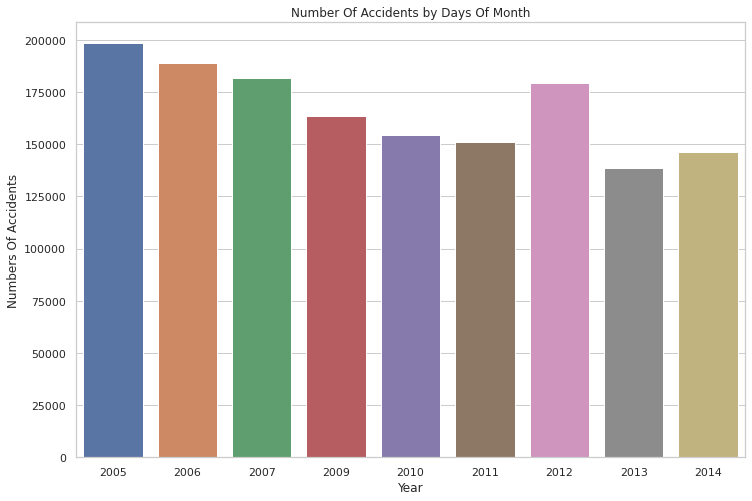

In [122]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(x="Year",data=dataset)
plt.title("Number Of Accidents by Days Of Month")
plt.xlabel("Year")
plt.ylabel("Numbers Of Accidents")
plt.show()

# 2.4 Accident by Time

We got the graphs of the accidents plotted according to the hours. In general, we noticed that there were more accidents during the commute times. As a solution to this, we recommend using public transport during business hours and ask employees to be more careful.

Text(0, 0.5, 'Number Of Accidents')

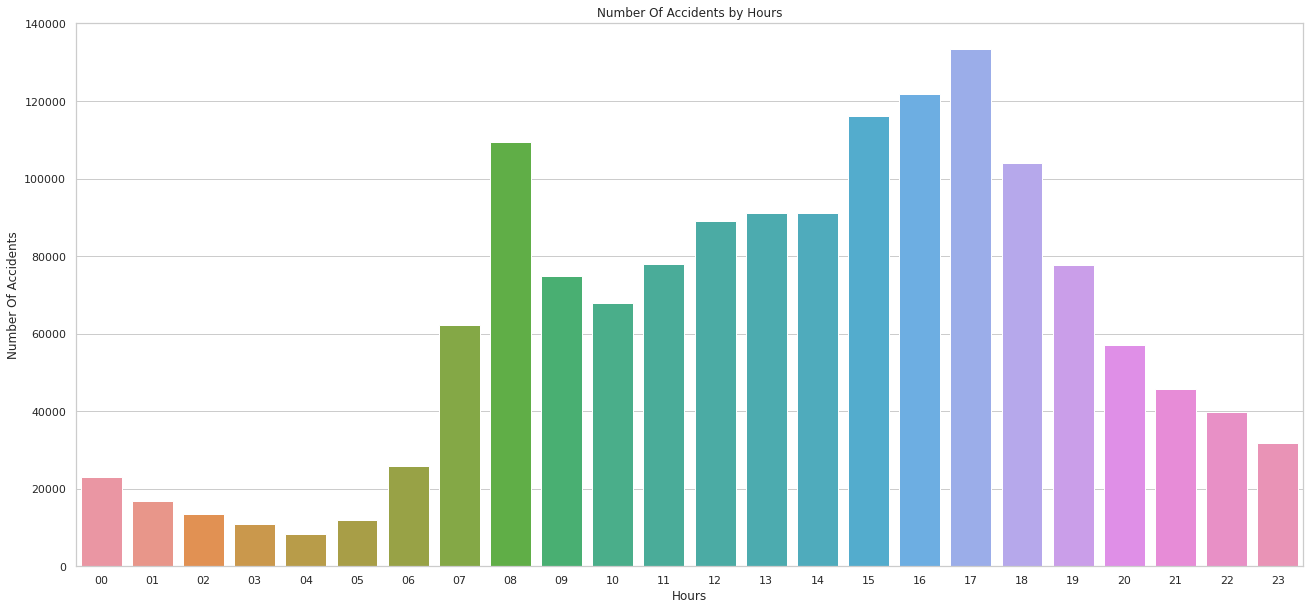

In [123]:
hours = pd.DataFrame(dataset["Time"].astype("datetime64"))
hours = pd.DataFrame(hours.Time.dt.strftime('%H').sort_values(),columns=["Time"])

plt.figure(figsize=(22,10))
sns.countplot(data=hours,x="Time")
plt.title("Number Of Accidents by Hours")
plt.xlabel("Hours")
plt.ylabel("Number Of Accidents")

# 3. Road surface Conditions

We put together a graph to see how road surface conditions affected the crash. We found that overall, the accident rate was higher on dry road surfaces.

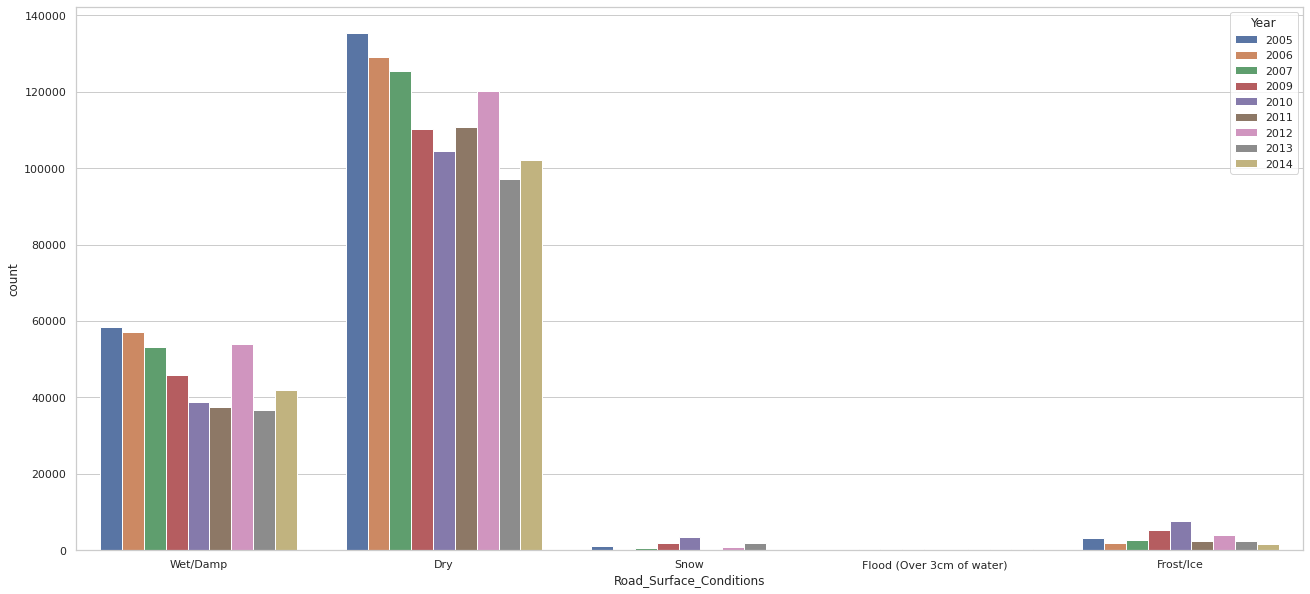

In [207]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset,x="Road_Surface_Conditions",hue="Year")

# 4. Accident severity

# 4.1 Accident Severity By Road Type

We tried to solve the relevance of the accident severity with the road type. When we consider the ratio of the accident severity to the road type in general, we saw that the accidents were more on the roads with single carrigeways and the deadliest accidents were here.

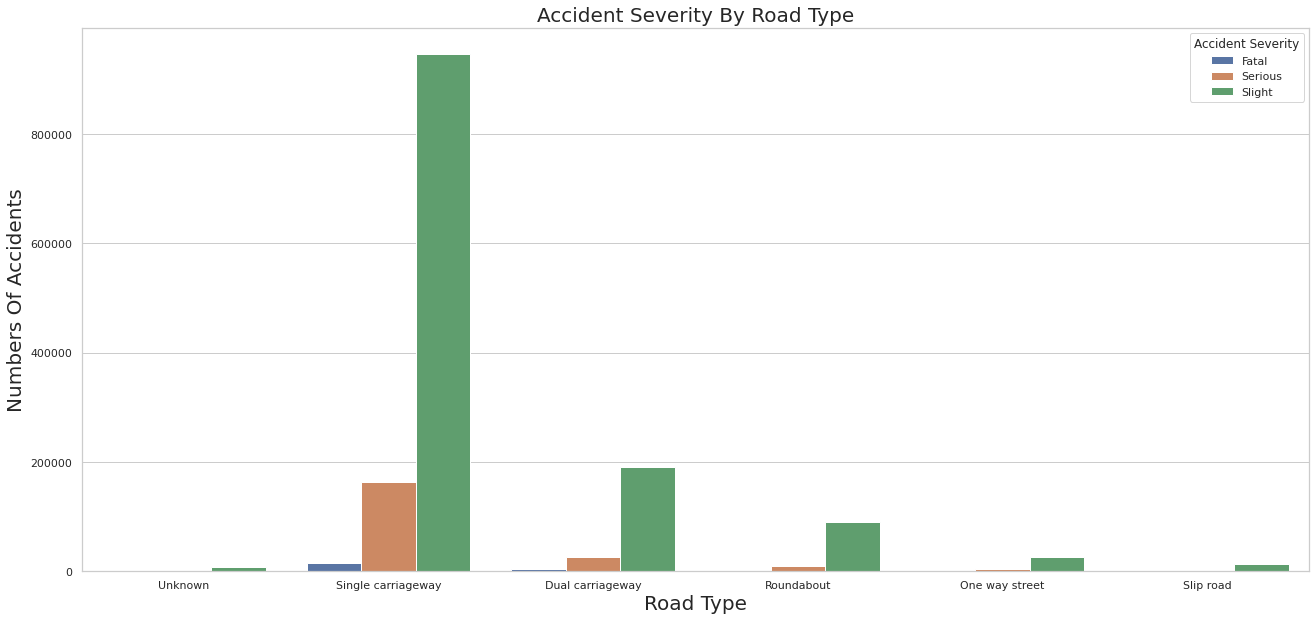

In [208]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset,x="Road_Type",hue="Accident_Severity")
plt.title("Accident Severity By Road Type",size=20)
plt.xlabel("Road Type",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

# 4.2 Accident Severity By Weather Conditions

We produced a graph by considering the effect of my accident severity on the weather situation separately. fine without high winds option with the most car accident turned out

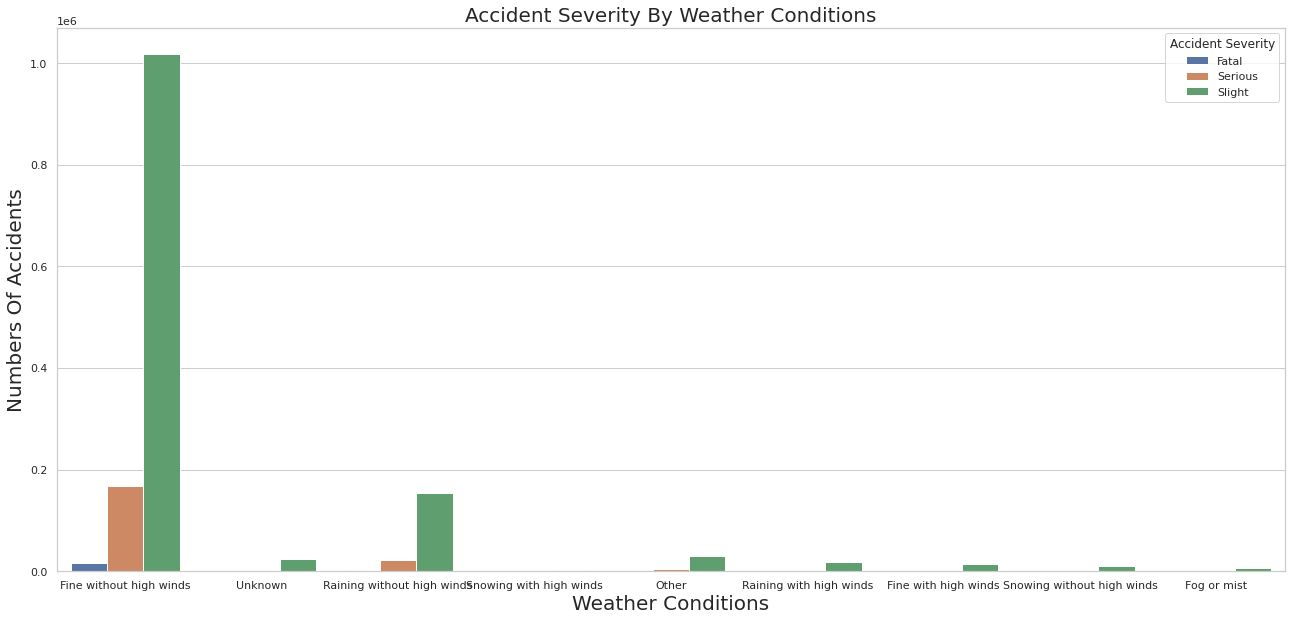

In [126]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset,x="Weather_Conditions",hue="Accident_Severity")
plt.title("Accident Severity By Weather Conditions",size=20)
plt.xlabel("Weather Conditions",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])


# 4.3 Accident Severity By Speed Limit

In general, we see that the number of accidents is high in places where the speed limit is 30, that is low. People do not want to go slow, so they have more accidents on important roads.

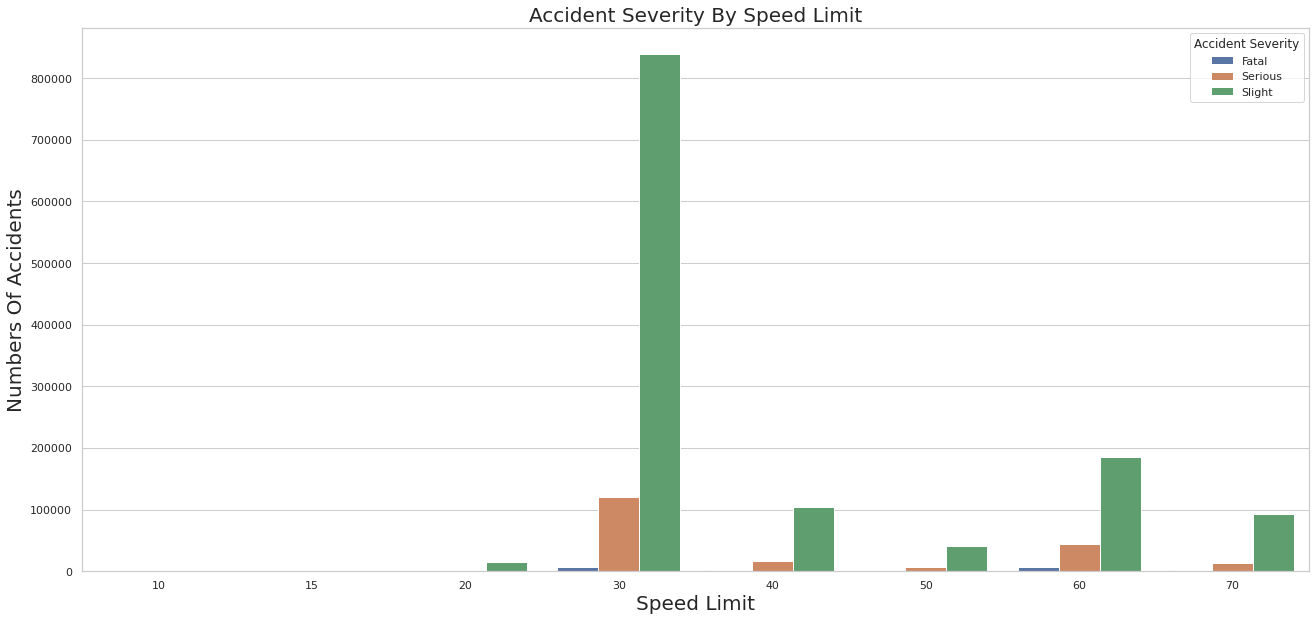

In [127]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset,x="Speed_limit",hue="Accident_Severity")
plt.title("Accident Severity By Speed Limit",size=20)
plt.xlabel("Speed Limit",size=20)
plt.ylabel("Numbers Of Accidents",size=20)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

# 4.4 Accident severity is fatal according to Year

We looked at the years in which the deadliest accidents occurred. We see a gradually decreasing graph, I think this is due to the increasing quality and technology of cars.

Text(0, 0.5, 'Numbers Of Accidents')

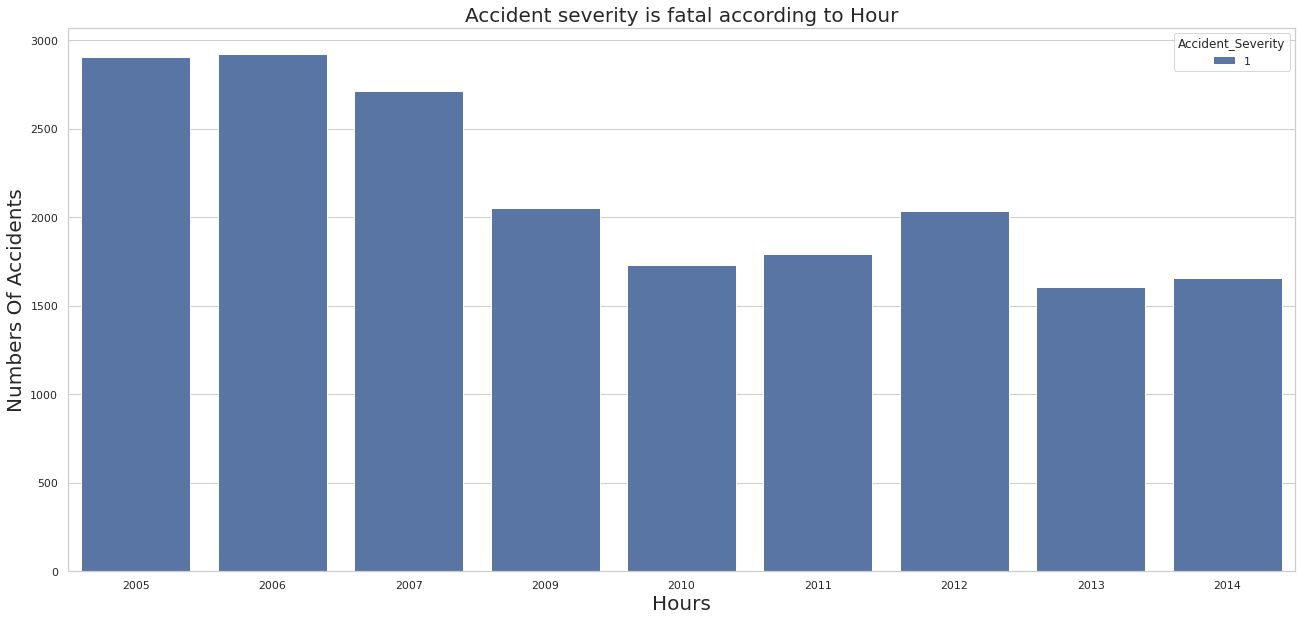

In [209]:
plt_data = dataset[dataset["Accident_Severity"] == 1]
plt.figure(figsize=(22,10))
sns.countplot(data=plt_data,x="Year",hue="Accident_Severity")
plt.title("Accident severity is fatal according to Year",size=20)
plt.xlabel("Hours",size=20)
plt.ylabel("Numbers Of Accidents",size=20)

# 5.Urban or rarel area

We discussed the accident rates in urban or rural areas. In general, we see that the accident rate is 70% higher in urban areas. This is due to the fact that people living in urban areas have more cars and more people.

   Urban_or_Rural_Area
1               970642
2               531180
3                   35


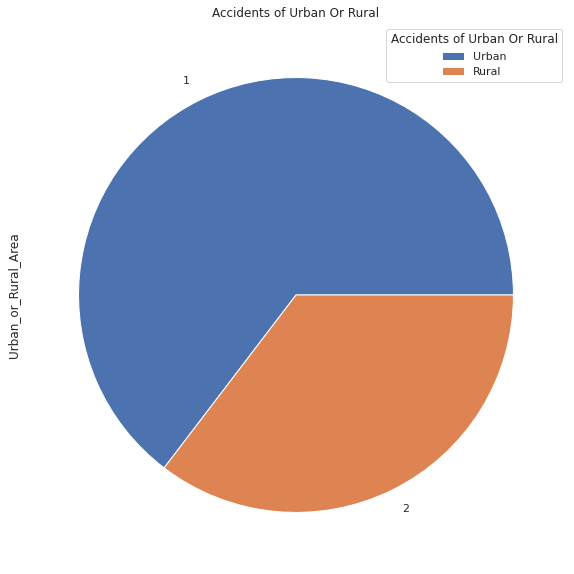

In [211]:
area = pd.DataFrame(dataset["Urban_or_Rural_Area"].value_counts())
print(area)
area = area.drop([3])

area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
plt.title("Accidents of Urban Or Rural")
plt.legend(title="Accidents of Urban Or Rural",labels=["Urban","Rural"])

We can say that accident rates have decreased in urban and rarel areas compared to previous years. We see more decreases in Rarel areas, because as the years progress, the number of migration to urban areas is higher in the following years.

Text(0, 0.5, 'Numbers Of Accidents')

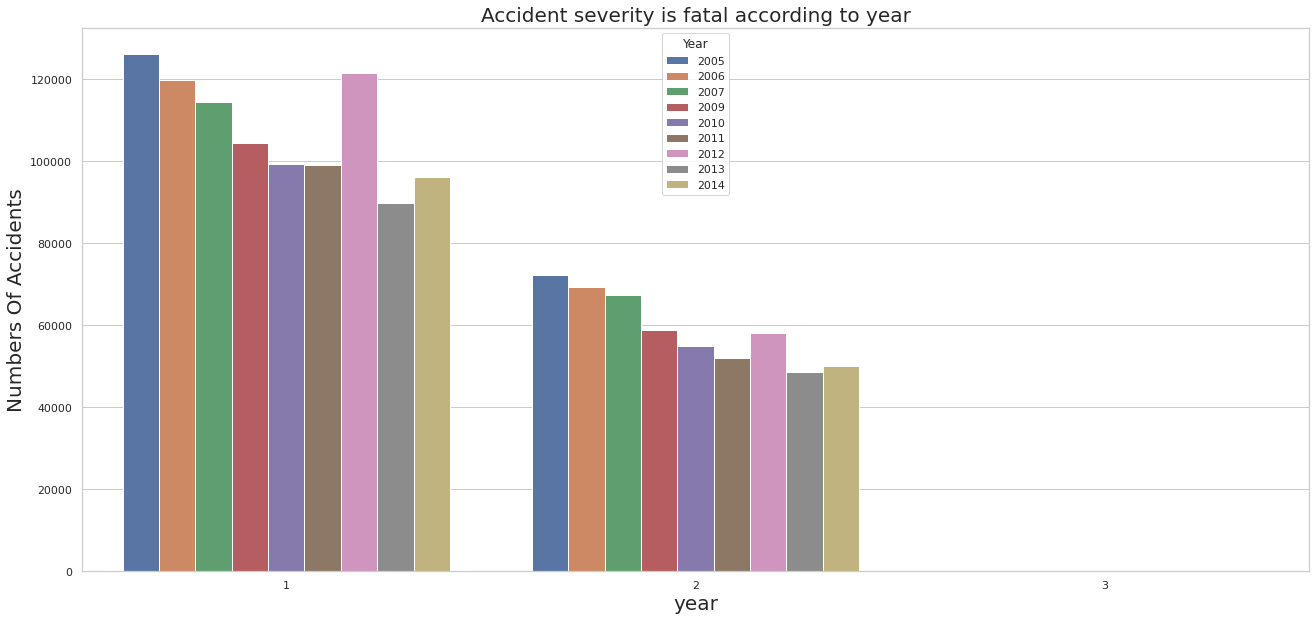

In [132]:
plt.figure(figsize=(22,10))
sns.countplot(data=dataset,x="Urban_or_Rural_Area",hue="Year")
plt.title("Accident severity is fatal according to year",size=20)
plt.xlabel("year",size=20)
plt.ylabel("Numbers Of Accidents",size=20)

# 6. Accident forecast with Machine Learning 

After making our data suitable for machine learning code, we start processing.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
machine_learning_data = dataset[["Speed_limit","Day_of_Week","Light_Conditions","Weather_Conditions","Urban_or_Rural_Area","Road_Surface_Conditions"]]
machine_learning_data["Light_Conditions"] = label_encoder.fit_transform(machine_learning_data["Light_Conditions"])
machine_learning_data["Weather_Conditions"] = label_encoder.fit_transform(machine_learning_data["Weather_Conditions"])
machine_learning_data["Road_Surface_Conditions"] = label_encoder.fit_transform(machine_learning_data["Road_Surface_Conditions"])

In [184]:
machine_learning_data

Speed_limit  Day_of_Week  Light_Conditions  Weather_Conditions  \
0                 30            6                 4                   1   
1                 30            1                 2                   8   
2                 40            4                 4                   1   
3                 60            6                 4                   1   
4                 30            7                 2                   5   
...              ...          ...               ...                 ...   
1504145           60            2                 4                   1   
1504146           60            3                 4                   5   
1504147           30            5                 4                   1   
1504148           60            3                 4                   1   
1504149           30            7                 4                   1   

         Urban_or_Rural_Area  Road_Surface_Conditions  
0                          1                        0  
1                          1                        0  
2                          1                        0  
3                          2                        0  
4                          1                        4  
...                      ...                      ...  
1504145                    1                        0  
1504146                    2                        4  
1504147                    1                        4  
1504148                    2                        0  
1504149                    1                        0  

[1501857 rows x 6 columns]

In [163]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

X = machine_learning_data.loc[:, machine_learning_data.columns != "Road_Surface_Conditions"]
y = machine_learning_data["Road_Surface_Conditions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score

f1_train = f1_score(y_test,y_pred, average="weighted", zero_division = 1)
recall_train = recall_score(y_test,y_pred, average="weighted", zero_division = 1)
precision_train = precision_score(y_test,y_pred, average="weighted", zero_division = 1)
acc_train = accuracy_score(y_test,y_pred)

We can easily estimate the accident rates that may occur in dry and flood events. But our accident forecast rate decreases on wet and snowy roads. For this reason, we ask the drivers to be more careful in wet and snowy weather.

Text(0.5, 1.0, 'Predicted with Test Data')

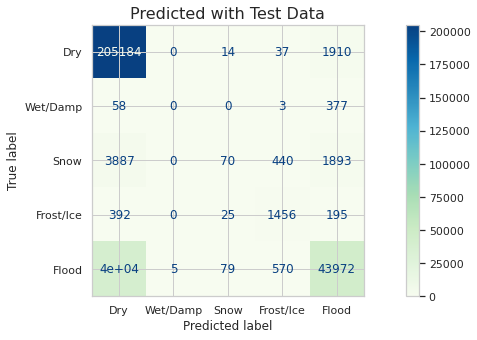

In [212]:
cm_train = confusion_matrix(y_test, y_pred)
keys_label = {0:"Dry",1:"Wet/Damp",2:"Snow",3:"Frost/Ice",4:"Flood"}
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=keys_label.values())
fig, (ax1) = plt.subplots(1, 1, figsize = (15, 5))
disp.plot(ax=ax1, cmap='GnBu')
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title('Predicted with Test Data', fontsize=16)